<a href="https://colab.research.google.com/github/OctaviaCosby/BeautySupplyAnalytics/blob/main/Camille_Beauty_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the libraries

In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import statistics as sts
# from google.io import uploader

Read raw csv file

In [ ]:
data = pd.read_csv('first_quarter_products.csv')
print(data)

               DEPARTMENT              ::CAT::  ::VENDOR::               CODE  \
0                     NaN                  NaN         NaN                NaN   
1                     WIG                 13X6  POS VENDOR             14M226   
2     GENERAL MERCHANDISE  GENERAL MERCHANDISE         NaN    ="850012481737"   
3     GENERAL MERCHANDISE  GENERAL MERCHANDISE         NaN  ="10705372003488"   
4     GENERAL MERCHANDISE  GENERAL MERCHANDISE         NaN    ="711716315042"   
...                   ...                  ...         ...                ...   
2758            CHEMICALS             SHAMPOOS         NaN    ="802535100480"   
2759  GENERAL MERCHANDISE  GENERAL MERCHANDISE         NaN    ="842510070711"   
2760  GENERAL MERCHANDISE  GENERAL MERCHANDISE         NaN    ="021306211327"   
2761  GENERAL MERCHANDISE  GENERAL MERCHANDISE         NaN   ="6181100530193"   
2762                  NaN                  NaN         NaN                NaN   

                           

remove columns and rows

In [ ]:
df_r_col = data.drop(["::VENDOR::", "COST"], axis = 1)
df = df_r_col.dropna()
df
#sum up the SBTLS and PRF



,DEPARTMENT,::CAT::,CODE,PRODUCT,QTY,SBTLS,PRF
1,WIG,13X6,14M226,.,45,352.09,352.09
2,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""850012481737""",BATANA OIL 2OZ,11,164.89,164.89
3,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""10705372003488""",PIN TAIL SECTION COMB,8,23.92,23.92
4,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""711716315042""",DIFEEL ROSEMARY OIL,4,36.03,23.28
5,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""7464804101371""",SILICON MIX HAIR TREATMENT 8OZ,10,68.87,38.87
...,...,...,...,...,...,...,...
2757,BRAIDING HAIR,CROCHET HAIR,"=""806993548259""",HONEY BLONDE PASSION TWIST,1,19.99,19.99
2758,CHEMICALS,SHAMPOOS,"=""802535100480""",APRICAN PRIDE BLACK CASTOR BRAID LOCK GEL 8OZ,1,6.99,3.59
2759,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""842510070711""",LUX SILKY TIE BONNET #7071,1,7.99,7.99
2760,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""021306211327""",ISOPLUS EXTRA VIRGIN OILIVE OIL SHAMPOO 16 OZ,1,5.99,5.99


In [ ]:
df['SBTLS']= df['SBTLS'].astype(float)
df

<ipython-input-42-7a0dd4a44bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SBTLS']= df['SBTLS'].astype(float)


,DEPARTMENT,::CAT::,CODE,PRODUCT,QTY,SBTLS,PRF
1,WIG,13X6,14M226,.,45,352.09,352.09
2,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""850012481737""",BATANA OIL 2OZ,11,164.89,164.89
3,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""10705372003488""",PIN TAIL SECTION COMB,8,23.92,23.92
4,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""711716315042""",DIFEEL ROSEMARY OIL,4,36.03,23.28
5,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""7464804101371""",SILICON MIX HAIR TREATMENT 8OZ,10,68.87,38.87
...,...,...,...,...,...,...,...
2757,BRAIDING HAIR,CROCHET HAIR,"=""806993548259""",HONEY BLONDE PASSION TWIST,1,19.99,19.99
2758,CHEMICALS,SHAMPOOS,"=""802535100480""",APRICAN PRIDE BLACK CASTOR BRAID LOCK GEL 8OZ,1,6.99,3.59
2759,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""842510070711""",LUX SILKY TIE BONNET #7071,1,7.99,7.99
2760,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""021306211327""",ISOPLUS EXTRA VIRGIN OILIVE OIL SHAMPOO 16 OZ,1,5.99,5.99


In [ ]:
df_category = df.groupby("::CAT::")[["SBTLS", "QTY"]]
sum_df_category = df_category.sum()
sort_cat = sum_df_category.sort_values(by = "SBTLS", ascending = False)
sort_cat

,SBTLS,QTY
::CAT::,,
GENERAL MERCHANDISE,29412.70,4306
X-PRESSION BRAIDING HAIR,7996.68,1018
GELS,4757.52,469
COLORS,3224.01,401
OILS,2245.35,234
SYNTHETIC,2060.69,98
SOAPS,1994.52,313
LOTIONS,1818.33,200
SHAMPOOS,1729.39,160


In [ ]:
df_product = df.groupby("PRODUCT")[["SBTLS", "QTY"]]
sum_products = df_product.sum()
sum_products
sorted_sum_products = sum_products.sort_values(by = "SBTLS", ascending = False)
sorted_sum_products

,SBTLS,QTY
PRODUCT,,
"=""3X X-PRESSION 58 - 1B""",632.31,106
BRAID GLAM EDGE CONTROL,526.48,43
DEEP WAVE HEADBAND WIG,493.99,2
HUMAN HAIR WIG,397.99,3
LATTAFA YARA CONCENTRATED PERFUME ROLL-ON OIL. 0.3,397.53,50
...,...,...
WET AND WAVY BRAIDING,0.00,0
GNS CHAIN ANKLET-CHA10G,0.00,0
SB 3X JAMAICAN TWIST PRESTRETCHED 36-SOM1BBG,0.00,0


<ipython-input-7-fb7b7508e806>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')


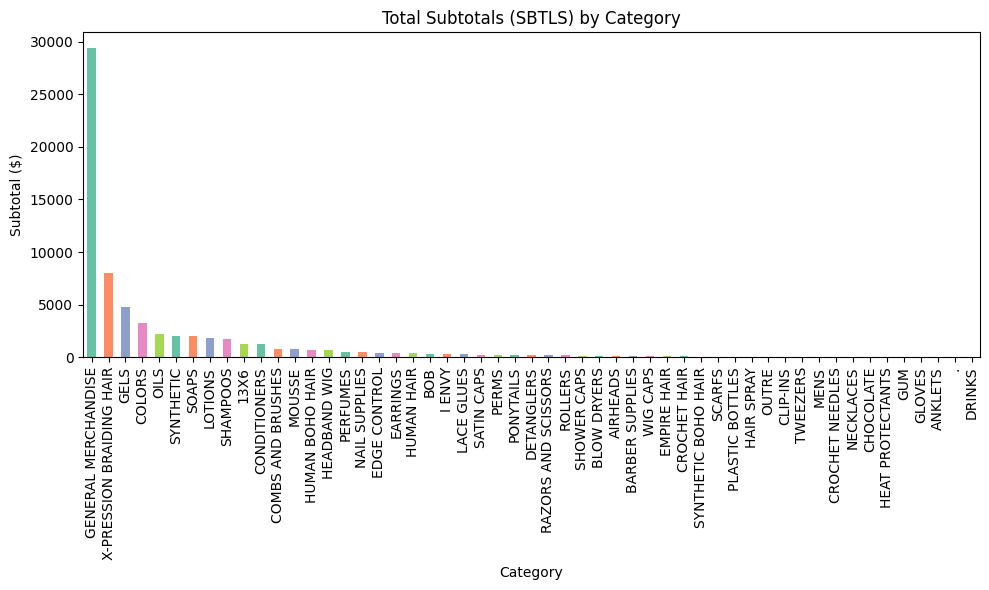

In [ ]:
#graph the data
from matplotlib.cm import get_cmap

cmap = get_cmap('Set2')
colors = cmap(range(len('SBTLS')))

plt.figure(figsize=(10,6))
sort_cat['SBTLS'].plot(kind='bar', color=colors)
plt.title('Total Subtotals (SBTLS) by Category')
plt.xlabel('Category')
plt.ylabel('Subtotal ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-8-ad3660a9266e>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')


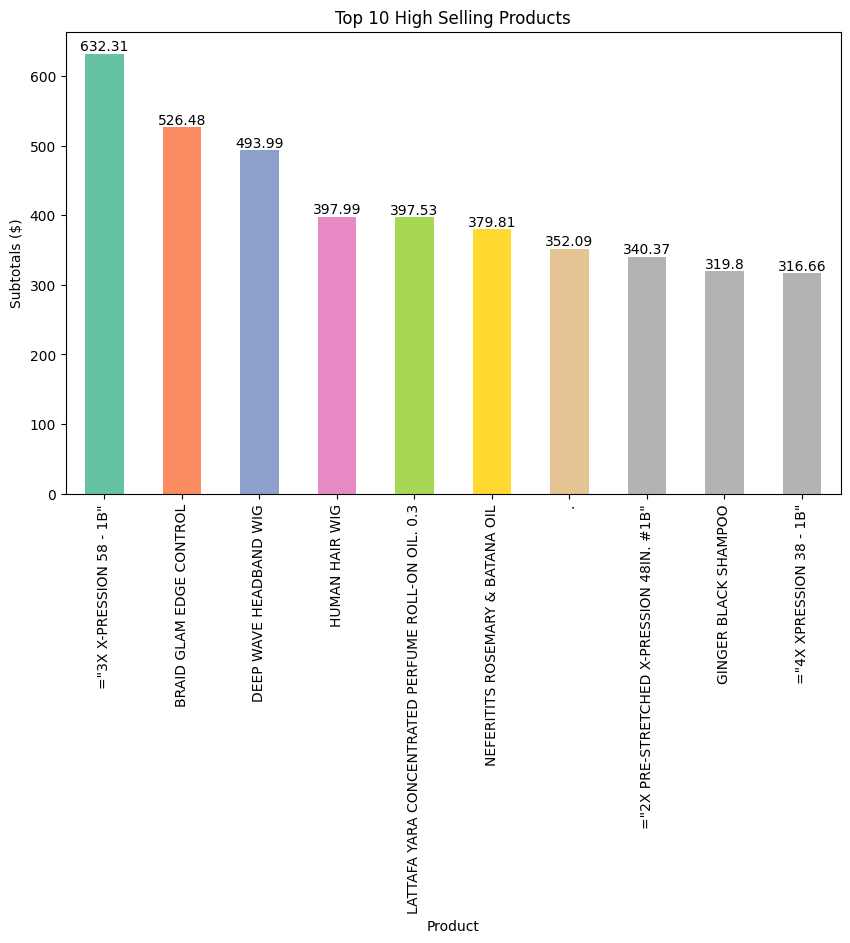

In [ ]:
from matplotlib.cm import get_cmap

cmap = get_cmap('Set2')
colors = cmap(range(10))
#top 10 products
top_10 = sorted_sum_products.head(10)
plt.figure(figsize = (10, 6))
top_10['SBTLS'].plot(kind='bar', color = colors)
for index, value in enumerate(top_10.index):
  plt.text(index, top_10.loc[value, 'SBTLS'], str(top_10.loc[value, 'SBTLS']), ha='center', va='bottom')
plt.title('Top 10 High Selling Products')
plt.xlabel("Product")
plt.ylabel('Subtotals ($)')
plt.show()

<ipython-input-9-5c7cfdac059b>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')


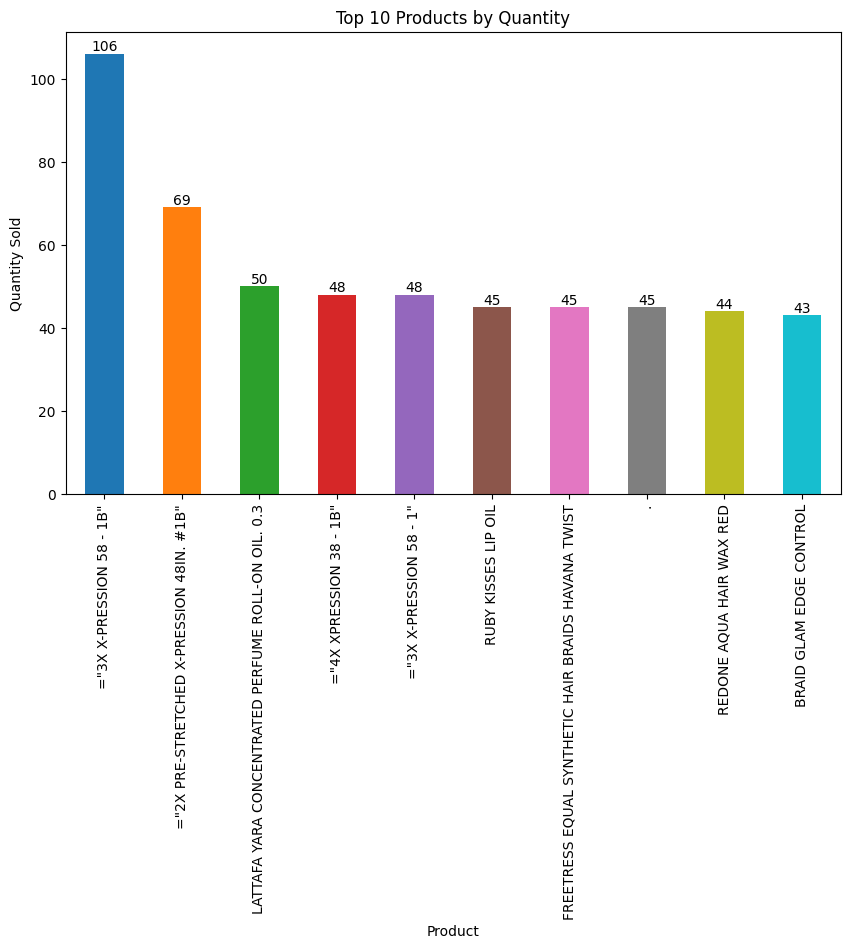

In [ ]:
#top 10 products by quantity
cmap = get_cmap('tab10')
colors = cmap(range(10))

top_10_qty = sorted_sum_products.sort_values(by='QTY', ascending=False).head(10)
plt.figure(figsize=(10,6))
#numbers above bars
top_10_qty['QTY'].plot(kind='bar', color = colors)
for index, value in enumerate(top_10_qty.index):
  plt.text(index, top_10_qty.loc[value, 'QTY'], str(top_10_qty.loc[value, 'QTY']), ha='center', va='bottom')
plt.title('Top 10 Products by Quantity')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

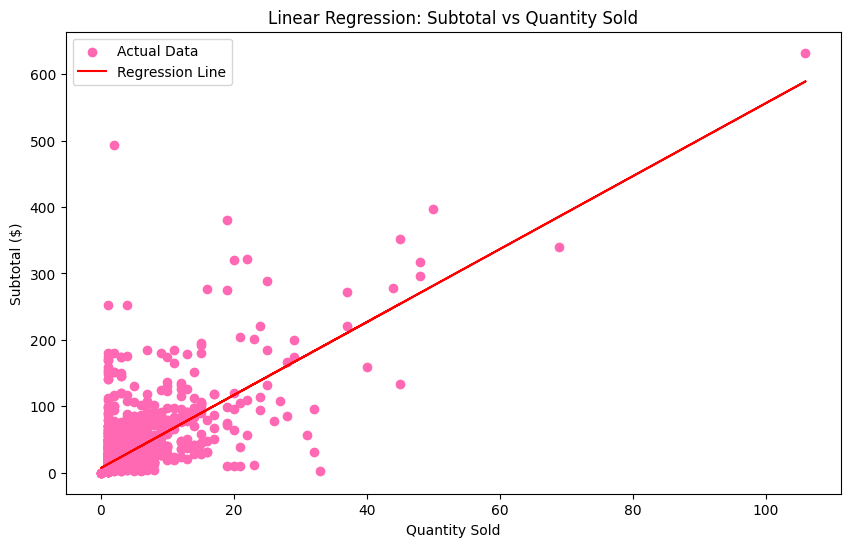

In [ ]:
#linear regression model
from sklearn.linear_model import LinearRegression

X = df_product.obj[["QTY"]]
y = df_product.obj["SBTLS"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

#plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = 'hotpink', label= 'Actual Data')
plt.plot(X, y_pred, color='red', label= "Regression Line")
plt.title("Linear Regression: Subtotal vs Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Subtotal ($)") #what did I wrong for what did I do wrong in this code?
plt.legend()
plt.show()

In [ ]:
!pip install ace_tools_open

In [ ]:
import pandas as pd

# Drop rows with missing product, quantity, or subtotal
df_clean = df.dropna(subset=['PRODUCT', 'QTY', 'SBTLS', 'PRF'])

# Convert 'SBTLS' from string to float
df_clean['SBTLS'] = df_clean['SBTLS'].replace('[\$,]', '', regex=True).astype(float)

# Group by product to get total quantity sold and total revenue
product_sales = df_clean.groupby('PRODUCT').agg({
    'QTY': 'sum',
    'SBTLS': 'sum',
    'PRF' : 'sum'
}).reset_index()

# Sort by quantity sold
product_sales = product_sales.sort_values(by='QTY', ascending=False)

# Display the first few rows
print(product_sales.head(10))


                                                PRODUCT  QTY   SBTLS  \
84                             ="3X X-PRESSION 58 - 1B"  106  632.31   
56             ="2X PRE-STRETCHED X-PRESSION 48IN. #1B"   69  340.37   
1553  LATTAFA YARA CONCENTRATED PERFUME ROLL-ON OIL....   50  397.53   
83                              ="3X X-PRESSION 58 - 1"   48  296.13   
115                             ="4X XPRESSION 38 - 1B"   48  316.66   
2153                                RUBY KISSES LIP OIL   45  133.52   
1222  FREETRESS EQUAL SYNTHETIC HAIR BRAIDS HAVANA T...   45  246.29   
23                                                    .   45  352.09   
2127                           REDONE AQUA HAIR WAX RED   44  278.55   
490                             BRAID GLAM EDGE CONTROL   43  526.48   

                                           PRF  
84                                      632.31  
56                                      340.37  
1553                                    397.53  
83         

<>:7: DeprecationWarning: invalid escape sequence '\$'
<>:7: DeprecationWarning: invalid escape sequence '\$'
<ipython-input-51-0112f8f8891f>:7: DeprecationWarning: invalid escape sequence '\$'
  df_clean['SBTLS'] = df_clean['SBTLS'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas

# Features and target
# Re-clean and convert the 'SBTLS' column in product_sales to ensure it's numeric
product_sales['SBTLS'] = product_sales['SBTLS'].replace('[\$,]', '', regex=True).astype(float)

X = product_sales[['SBTLS', 'PRF']]
y = product_sales['QTY']

# Standardize features
scaler = StandardScaler()
# Now X should only contain numeric values, allowing fit_transform to work
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

<>:9: DeprecationWarning: invalid escape sequence '\$'
<>:9: DeprecationWarning: invalid escape sequence '\$'
<ipython-input-53-a499f873c61d>:9: DeprecationWarning: invalid escape sequence '\$'
  product_sales['SBTLS'] = product_sales['SBTLS'].replace('[\$,]', '', regex=True).astype(float)


ValueError: could not convert string to float: '35.9419.9653.7129.3617.9731.4523.9633.94'

In [ ]:
# Re-import necessary libraries after code state reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Reload the uploaded file
file_path = '/content/first_quarter_products.csv'
df = pd.read_csv(file_path)

# Clean up and drop missing values in relevant columns
df_clean = df.dropna(subset=['PRODUCT', 'QTY', 'SBTLS', 'PRF'])

# Convert 'SBTLS' and 'PRF' from string to float
for col in ['SBTLS', 'PRF']:
    df_clean[col] = df_clean[col].replace('[\$,]', '', regex=True).astype(float)

# Group by product to get aggregated values
product_sales = df_clean.groupby('PRODUCT').agg({
    'QTY': 'sum',
    'SBTLS': 'sum',
    'PRF': 'sum'
}).reset_index()

# Prepare features and target
X = product_sales[['SBTLS', 'PRF']]
y = product_sales['QTY']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

<>:17: DeprecationWarning: invalid escape sequence '\$'
<>:17: DeprecationWarning: invalid escape sequence '\$'
<ipython-input-57-27845cfce9a3>:17: DeprecationWarning: invalid escape sequence '\$'
  df_clean[col] = df_clean[col].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-57-27845cfce9a3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-57-27845cfce9a3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

(657.699942112082, 0.19252076462666812)

In [ ]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.5 MB/s eta 0:00:00


In [ ]:
df['PRODUCT'].nunique
df.shape

(2723, 6)

<ipython-input-88-9a856f790f1b>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sales_summary = product_sales.groupby('price_bin')['QTY'].mean().reset_index()


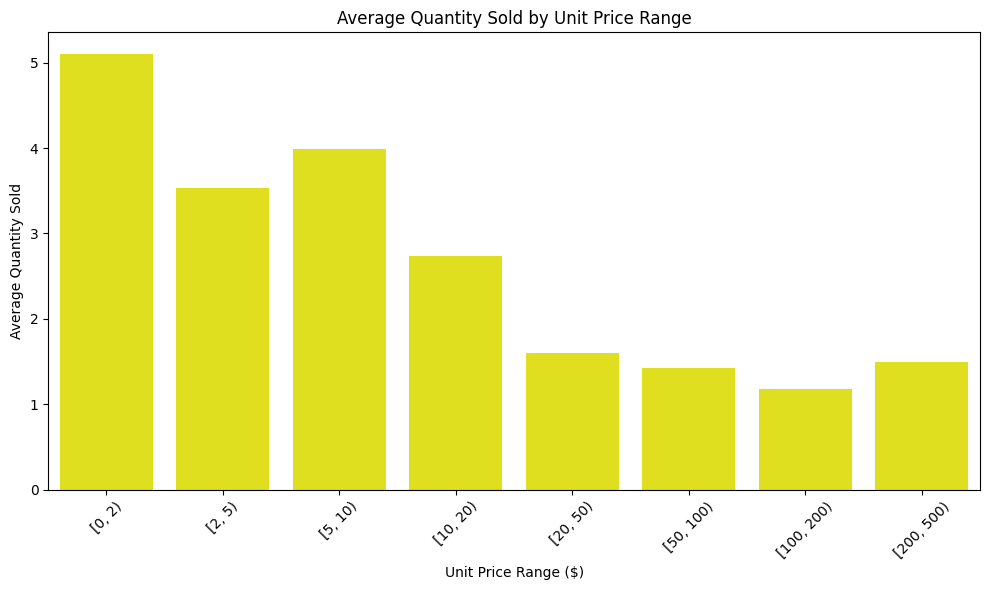

,price_bin,QTY
0,"[0, 2)",5.099291
1,"[2, 5)",3.532988
2,"[5, 10)",3.991589
3,"[10, 20)",2.733051
4,"[20, 50)",1.596154
5,"[50, 100)",1.419355
6,"[100, 200)",1.181818
7,"[200, 500)",1.500000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create unit price column
product_sales['unit_price'] = product_sales['SBTLS'] / product_sales['QTY']

# Bin unit prices into ranges
product_sales['price_bin'] = pd.cut(product_sales['unit_price'], bins=[0, 2, 5, 10, 20, 50, 100, 200, 500], right=False)

# Calculate average QTY sold per price bin
price_sales_summary = product_sales.groupby('price_bin')['QTY'].mean().reset_index()

# Plot average quantity sold by price bin
plt.figure(figsize=(10, 6))
sns.barplot(data=price_sales_summary, x='price_bin', y='QTY', color="yellow")
plt.xticks(rotation=45)
plt.title('Average Quantity Sold by Unit Price Range')
plt.xlabel('Unit Price Range ($)')
plt.ylabel('Average Quantity Sold')
plt.tight_layout()
plt.show()

price_sales_summary


Bulk Inventory for $0–$2 and $5–$10 products — they're top sellers.

Test price drops for slow-moving $10–$50 items to see if demand increases.

Use high-priced items strategically for display or bundling rather than bulk stocking.


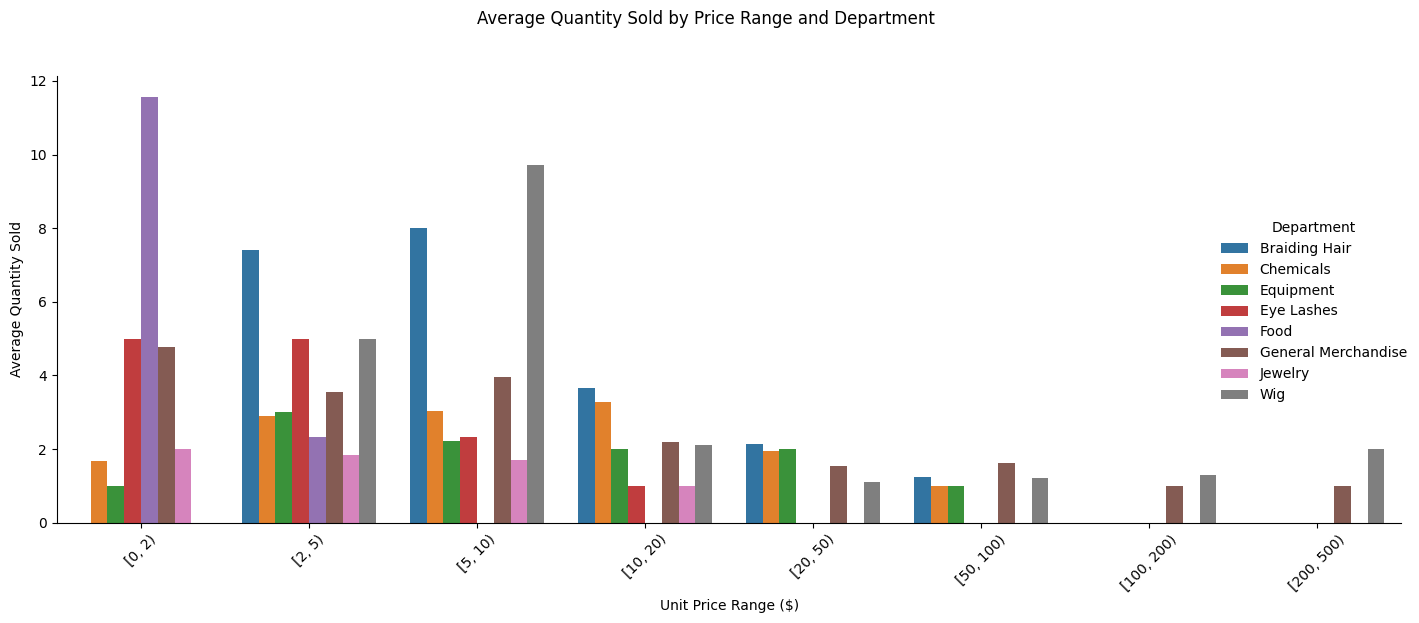

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Average quantity sold by price range for each department
g = sns.catplot(
    data=dept_price_summary,
    kind="bar",
    x="price_bin", y="QTY", hue="DEPARTMENT",
    height=6, aspect=2
)

# Customize legend
g._legend.set_title("Department")  # Set legend title
for t in g._legend.texts:
    t.set_text(t.get_text().title())  # Capitalize department names if needed

# Axis labels and title
g.set_xticklabels(rotation=45)
g.set_axis_labels("Unit Price Range ($)", "Average Quantity Sold")
g.fig.suptitle("Average Quantity Sold by Price Range and Department", y=1.03)

plt.tight_layout()
plt.show()


In [ ]:
#basket analysis

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

#convert code to string
df['CODE'] = df['CODE'].astype(str)

#create list of prods for each transaction
transactions = df.groupby('CODE')['PRODUCT'].apply(list).reset_index()

#transaction encoder
te = TransactionEncoder()
te_ary = te.fit(transactions['PRODUCT']).transform(transactions['PRODUCT'])
basket_sets = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support = 0.001, use_colnames= True, max_len = 3)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold = 1.0)

#sort rules
rules_sorted = rules.sort_values(by='lift', ascending=False)

rules_sorted.head(10)
df.head(10)


<ipython-input-12-d7b6e6890b7e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CODE'] = df['CODE'].astype(str)


,DEPARTMENT,::CAT::,CODE,PRODUCT,QTY,SBTLS
1,WIG,13X6,14M226,.,45,352.09
2,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""850012481737""",BATANA OIL 2OZ,11,164.89
3,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""10705372003488""",PIN TAIL SECTION COMB,8,23.92
4,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""711716315042""",DIFEEL ROSEMARY OIL,4,36.03
5,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""7464804101371""",SILICON MIX HAIR TREATMENT 8OZ,10,68.87
6,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""850019965605""",LOCKNTWIST,6,77.94
7,CHEMICALS,COLORS,"=""661157104081""",ADORE CREATIVE IMAGE HAIR COLOR #58 CINNAMON,5,34.95
9,CHEMICALS,COLORS,"=""075724640412""",CREME OF NATURE LIQUID HAIR COLOR - #41 HONEY ...,2,11.98
10,GENERAL MERCHANDISE,GENERAL MERCHANDISE,"=""017000300450""",GOT2B GLUED FREEZE SPRAY 2OZ,24,114.26
11,WIG,SYNTHETIC,"=""821090138240""",FREETRESS EQUAL SYNTHETIC HAIR BRAIDS HAVANA T...,6,35.94


In [ ]:
print(frequent_itemsets.head(27))
print(f"Number of itemsets found: {len(frequent_itemsets)}")

     support                                           itemsets
0   0.001102                                            (BELLO)
1   0.001469                                            (BRUSH)
2   0.001102                                            (COMBS)
3   0.001102                      (CUBIC ZIRCONIA EARRING-GOLD)
4   0.001469                          (CUBIC ZIRCONIA NECKLACE)
5   0.001836                            (CZ MICRO PAVE EARRING)
6   0.001102                      (DIAMOND LOOK CUBIC ZIRCONIA)
7   0.001469              (DIAMOND LOOK CUBIC ZIRCONIA EARRING)
8   0.001469                                         (EARRINGS)
9   0.001102                                             (EDEN)
10  0.001102                                     (EDGE BOOSTER)
11  0.001102                                     (ELASTIC BAND)
12  0.002938  (FREETRESS EQUAL SYNTHETIC HAIR BRAIDS HAVANA ...
13  0.001102                                 (HAIR ACCESSORIES)
14  0.001102                            

### Pricing and Purchasing Dates/Times

In [ ]:
import pandas as pd

# Load the new CSV file
time_df = pd.read_csv('/content/first_quarter.csv')

# Display structure and preview
time_df.info(), time_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     108 non-null    object 
 1   WDAY     108 non-null    object 
 2   TN       108 non-null    object 
 3   SALES    108 non-null    object 
 4   GIFT     108 non-null    int64  
 5   STR      108 non-null    int64  
 6   PO       108 non-null    object 
 7   TX       108 non-null    object 
 8   TOTAL    108 non-null    object 
 9   CASH     108 non-null    float64
 10  CREDIT   108 non-null    float64
 11  DEBIT    108 non-null    float64
 12  OTHER    107 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 11.1+ KB


(None,
          DATE WDAY  TN       SALES  GIFT  STR PO     TX       TOTAL     CASH   \
 0  2025-01-01  Wed  29      740.39     0    0  0  50.01      790.40  20868.60   
 1  2025-01-02  Thu  47   1,234.24      0    0  0  83.65   1,317.89     648.00   
 2  2025-01-03  Fri  45      930.65     0    0  0  63.11      993.76    314.00   
 3  2025-01-04  Sat  60   1,237.33      0    0  0  83.18   1,320.51     431.54   
 4  2025-01-05  Sun  24      454.94     0    0  0  31.89      486.83    109.92   
 
     CREDIT     DEBIT   OTHER   
 0  41955.44  13642.09     0.0  
 1    610.38     59.51     0.0  
 2    496.20    183.56     0.0  
 3    683.52    205.45     0.0  
 4    244.28    132.63     0.0  )

In [ ]:
# Identify the problematic row in the DATE column
invalid_date_rows = time_df[~time_df['DATE'].str.match(r'^\d{4}-\d{2}-\d{2}$', na=False)]
invalid_date_rows


,DATE,WDAY,TN,SALES,GIFT,STR,PO,TX,TOTAL,CASH,CREDIT,DEBIT,OTHER
107,TOTAL,"3,434.00","72,282.17",0,0,0,"4,943.56","76,629.87",20868.60,41955.44,13642.09,163.74,NaN


In [ ]:
!pip install statsmodels

<>:12: DeprecationWarning: invalid escape sequence '\$'
<>:12: DeprecationWarning: invalid escape sequence '\$'
<ipython-input-142-2a84be68dc32>:12: DeprecationWarning: invalid escape sequence '\$'
  time_df['SALES'] = time_df['SALES'].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-142-2a84be68dc32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['DATE'] = pd.to_datetime(time_df['DATE'])
<ipython-input-142-2a84be68dc32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['Weekda

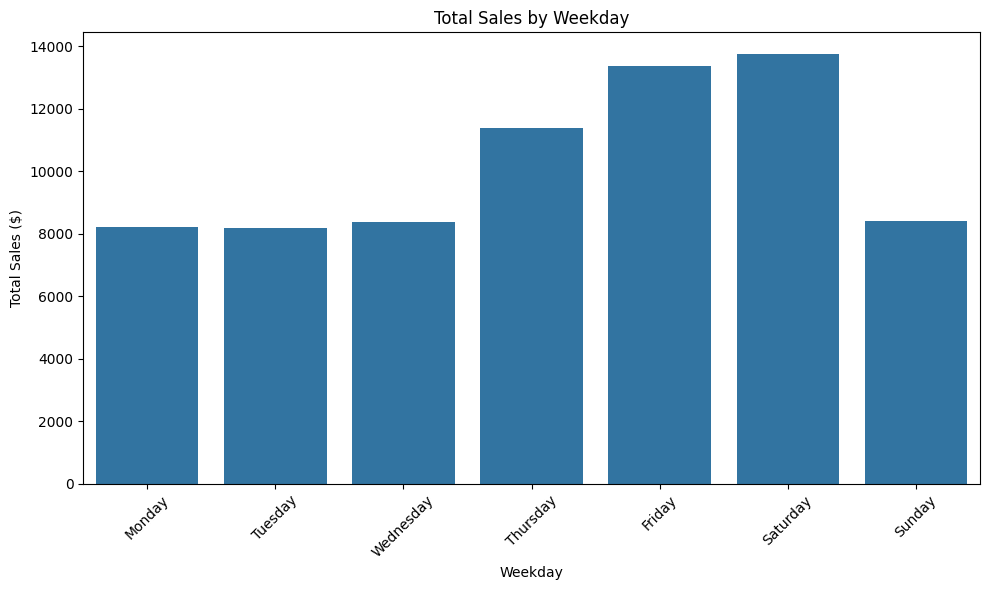

,Weekday,SALES
0,Monday,8223.99
1,Tuesday,8176.98
2,Wednesday,8367.87
3,Thursday,11372.67
4,Friday,13384.26
5,Saturday,13759.71
6,Sunday,8400.83


In [ ]:
# Ensure DATE is in datetime format and remove the 'TOTAL' row
time_df = time_df[time_df['DATE'] != 'TOTAL']
time_df['DATE'] = pd.to_datetime(time_df['DATE'])

# Set DATE as index to easily extract weekday
time_df.set_index('DATE', inplace=True)

# Extract weekday name into a new column
time_df['Weekday'] = time_df.index.day_name()

# Convert SALES to float, replacing '$' and ','
time_df['SALES'] = time_df['SALES'].replace('[\$,]', '', regex=True).astype(float)

# Total sales per weekday
total_sales_weekday = time_df.groupby('Weekday')['SALES'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Plot total sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales_weekday, x='Weekday', y='SALES')
plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

total_sales_weekday.round(2)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Remove the invalid summary row where DATE == 'TOTAL'
time_df = time_df[time_df['DATE'] != 'TOTAL']

# Convert DATE to datetime and SALES to float
time_df['DATE'] = pd.to_datetime(time_df['DATE'])
time_df['SALES'] = time_df['SALES'].replace('[\$,]', '', regex=True).astype(float)

# Set index and resample
time_df.set_index('DATE', inplace=True)
daily_sales = time_df['SALES'].resample('D').sum()

# Plot daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales', color="purple")
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.tight_layout()
plt.show()

decomposition = seasonal_decompose(daily_sales, model='additive', period=7)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Daily Sales', y=1.02)
plt.tight_layout()
plt.show()


<>:8: DeprecationWarning: invalid escape sequence '\$'
<>:8: DeprecationWarning: invalid escape sequence '\$'
<ipython-input-137-9c38d68c772e>:8: DeprecationWarning: invalid escape sequence '\$'
  time_df['SALES'] = time_df['SALES'].replace('[\$,]', '', regex=True).astype(float)


KeyError: 'DATE'

<ipython-input-120-7baacedd5de9>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = time_df['SALES'].resample('M').sum().reset_index()


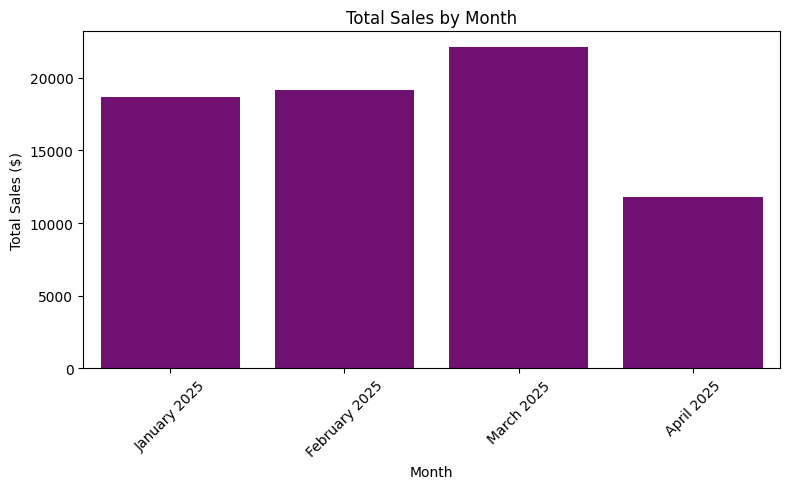

,Month,SALES
0,January 2025,18662.18
1,February 2025,19155.88
2,March 2025,22099.56
3,April 2025,11768.69


In [ ]:
# Ensure index is datetime
time_df.index = pd.to_datetime(time_df.index)

# Group total sales by month
monthly_sales = time_df['SALES'].resample('M').sum().reset_index()
monthly_sales['Month'] = monthly_sales['DATE'].dt.strftime('%B %Y')

# Plot total sales by month
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_sales, x='Month', y='SALES', color = "purple")
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

monthly_sales[['Month', 'SALES']].round(2)


- March 2025 had the highest overall sales — ideal for identifying what products or events drove the spike.


- January and February had similar totals.

Saturday and Friday are the top-performing days in total sales.


Tuesday and Monday see the lowest sales volume overall.


This aligns with the earlier analysis on average sales and seasonality.

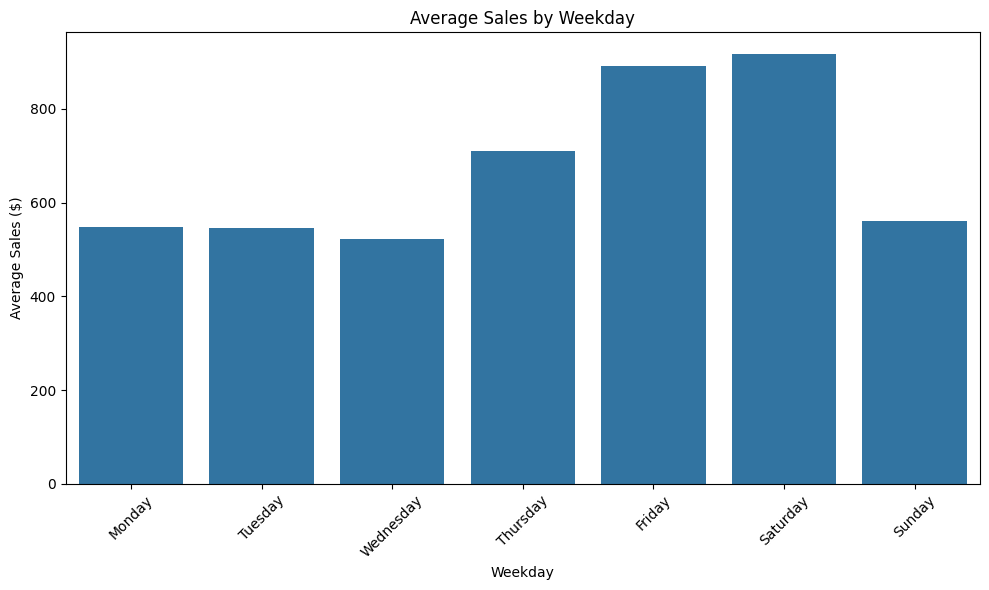

,Weekday,SALES
5,Saturday,917.314000
4,Friday,892.284000
3,Thursday,710.791875
6,Sunday,560.055333
0,Monday,548.266000
1,Tuesday,545.132000
2,Wednesday,522.991875


In [ ]:
# Extract weekday names from the datetime index
time_df['Weekday'] = time_df.index.day_name()

# Group by weekday and compute average sales
weekday_sales = time_df.groupby('Weekday')['SALES'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_sales, x='Weekday', y='SALES')
plt.title('Average Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

weekday_sales.sort_values(by='SALES', ascending=False)


📈 1. Sales Trend (Top Plot)
Shows the overall direction of sales over time.

You may notice a slight decline or leveling off in the second half of the quarter.


🔄 2. Seasonality (Middle Plot)
A clear weekly cycle is visible:

Sales spike consistently on certain days (likely weekends),

Dip on others (possibly midweek).

This confirms a seasonal buying pattern, likely driven by shopping habits around weekends or paydays.


🔍 3. Residuals (Bottom Plot)
These are the random fluctuations not explained by trend or seasonality.

Helps identify anomalies (e.g., unusually high or low sales days).

---------------------------------------------------


Saturday is the peak sales day, followed closely by Friday — these should be key focus days for inventory stocking and staffing.

Wednesday is the slowest day, suggesting a lull midweek.


| **SWOT Dimension** | **Camille’s Beauty**                                                                                                                                                                                                                                                            | **Typical Competitors**                                                                                                                                                             |
| ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Strengths**      | - Competitive pricing for services and products<br>- Strong positive reviews mentioning friendly staff, clean atmosphere, and good customer service<br>- Focus on **Black-owned**, local identity can attract loyalty<br>- Likely niche services (braiding, natural hair, etc.) | - Larger product variety due to bulk purchasing<br>- More established brand recognition (e.g., Sally Beauty)<br>- Often have loyalty rewards or price matching                      |
| **Weaknesses**     | - Smaller product range<br>- May not carry mass-market or specialty imported products<br>- Limited staff or availability during peak hours<br>- May lack online store or delivery                                                                                               | - Inconsistent service at chain locations<br>- Less personalized service<br>- Higher prices on niche cultural items                                                                 |
| **Opportunities**  | - Expand curated product lines (e.g., natural hair, vegan beauty)<br>- Increase service bundling (e.g., wash + style + product deals)<br>- Partner with local stylists/influencers<br>- Launch online ordering or curbside pickup                                               | - Expand into more diverse service offerings<br>- Local partnerships with stylists or schools<br>- Integrate AR/AI for virtual try-ons                                              |
| **Threats**        | - Price competition from larger chains<br>- Inflation impacting product cost or supplier availability<br>- Limited parking or location traffic<br>- Poor reviews or inconsistent service could hurt small business faster                                                       | - Disruptors like Amazon or Ulta dominate price + convenience<br>- Negative publicity spreads quickly via social media<br>- Economic downturns reduce discretionary beauty spending |


| Product Category | Example Product                                                        | Price Range | Notes                            |                                                                                                                                                                          |
| ---------------- | ---------------------------------------------------------------------- | ----------- | -------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| Braiding Hair    | OUTRE Braids X-Pression 3X Pre Stretched Braid 42"                     | \$4.00      | High demand, affordable pricing  |                                                                                                                                                                          |
| Crochet Braids   | OUTRE Crochet Braids X-Pression Twisted Up 3X Springy Afro Twist - 16" | \$9.00      | Popular style, mid-range pricing |                                                                                                                                                                          |
| Hair Bundles     | B\&B Express Multipacks Natural Colors                                 | \$25.00+    | Value packs for bulk purchases   |                                                                                                                                                                          |
| Promotions       | EBIN NEW YORK 24 Hour Edge Tamer - Extra Mega Hold                     | \$10.00     | Included in BOGO deals           | ([Ali Beauty Supply][1], [Ali Beauty Supply][2], [Ali Beauty Supply][3], [Ali Beauty Supply][4], [Ali Beauty Supply][5], [Ali Beauty Supply][6], [Ali Beauty Supply][7]) |

[1]: https://www.alibeautysupply.com/?srsltid=AfmBOoo33RSZEZ5FRW89scAlsLdC-3VepiTpI2oeBqgJtIQbGMrm8X7X&utm_source=chatgpt.com "Ali Beauty Supply : Wigs, Hair Extensions and Beauty Supply"
[2]: https://www.alibeautysupply.com/?srsltid=AfmBOoouLzvc4lAVYSbYPnXYzPYOMAaxoFMfr25Dkw7miyGELj6rVOiU&utm_source=chatgpt.com "Ali Beauty Supply : Wigs, Hair Extensions and Beauty Supply"
[3]: https://www.alibeautysupply.com/?utm_source=chatgpt.com "Ali Beauty Supply :: Wigs, Hair Extensions and Beauty Supply"
[4]: https://www.alibeautysupply.com/collections/multipacks-products?srsltid=AfmBOorsORynV0AixtEAJdd2TgW4HhNTjBPNJZzI1in0M2lqrKtdti-g&utm_source=chatgpt.com "3 BUNDLE MULTIPACKS - Ali Beauty Supply"
[5]: https://www.alibeautysupply.com/collections/multipacks-products?srsltid=AfmBOoqDYqLLp257y7WYTUha4C0HDpCVl9KzPWrPtSkpE0keTOJkfN1a&utm_source=chatgpt.com "3 BUNDLE MULTIPACKS - Ali Beauty Supply"
[6]: https://www.alibeautysupply.com/collections/bundle-discount-items?srsltid=AfmBOoqaDZzQWPbH_4dg0PyXJGGCmx5rR3oH0X-whnkNhGVWgg6MESkh&utm_source=chatgpt.com "BOGO DISCOUNT ITEMS - Ali Beauty Supply"
[7]: https://www.alibeautysupply.com/products/fashion-plus-multi-packs-straight-body-wave?utm_source=chatgpt.com "FASHION PLUS - Multi-packs – Ali Beauty Supply"

- Competitive Pricing: Products are priced affordably, such as the OUTRE Braids at $4.00, making them accessible to a wide customer base.

- Bundle Offers: They offer 3-bundle multipacks ranging from $25.00 to $80.00, providing value for customers purchasing in bulk.

- BOGO Discounts: A selection of items is available under "Buy One, Get One" deals, encouraging higher purchase volumes.

- Customer Testimonials: Positive reviews highlight satisfaction with product quality and pricing, reinforcing their value proposition.

This analysis provides insight into Ali Beauty Supply's product offerings and pricing strategies, which focus on affordability, value bundles, and promotional deals to attract customers.

high-impact, low-cost marketing ideas that can yield big results — especially for local businesses like beauty supply stores, salons, or boutiques:

🌟 1. Customer Referral Program
Cost: Low (discounts or small freebies)

Impact: High trust and conversion

Example: “Bring a friend, both get 10% off” or “Refer 3 friends, get a free edge control”

📲 2. TikTok & Instagram Reels
Cost: Free (DIY on your phone)

Impact: Viral potential, great brand exposure

What to Post:

Product demos (e.g., edge control hold tests)

“Before & after” braiding or wig installs

Customer testimonials

Behind-the-scenes in the store

🤝 3. Partner with Local Influencers or Stylists
Cost: Free or low barter (e.g., free product in exchange for a post)

Impact: Taps into local, loyal audiences

Example: “We gave this edge tamer to @YourFaveStylist and here’s what she thinks…”

📦 4. Bundle & Upsell Promotions
Cost: Minimal (strategic pricing)

Impact: Boosts average order value

Example:

“Buy 2 X-Pression packs, get edge control 50% off”

“Starter kits” for braiding or natural hair routines

✍️ 5. Collect Google Reviews & Use Them
Cost: Free

Impact: Builds trust + SEO ranking

How: Ask happy customers to leave a review — give a free sample or future discount as thanks. Then use those reviews in social posts.

🎨 6. Host a Themed Contest or Challenge
Cost: Low (prize can be store credit or a product)

Impact: Drives UGC (user-generated content) + brand awareness

Examples:

“Best edges challenge” using your edge control

“Best braided style” contest tagged with your store

💌 7. Text Marketing or WhatsApp Drops
Cost: Free to low

Impact: High open rate + immediate action

Strategy: Use texts to announce flash sales, restocks, or new arrivals

🛍️ 8. “Product of the Week”
Cost: Free

Impact: Builds urgency and familiarity with your inventory

How: Choose 1 product to highlight weekly on social media and in-store with a story + testimonial

🧑‍🎓 9. Free Mini Workshops or Demos
Cost: Time only

Impact: Positions your store as an expert hub

Examples:

“How to maintain your protective styles”

“Wig care 101”

“Edge control: Which one works for YOU?”

📌 10. Pop-Up at Local Events
Cost: Low table fee

Impact: Direct access to target audience

Where: School events, church fairs, natural hair expos, sorority meetups

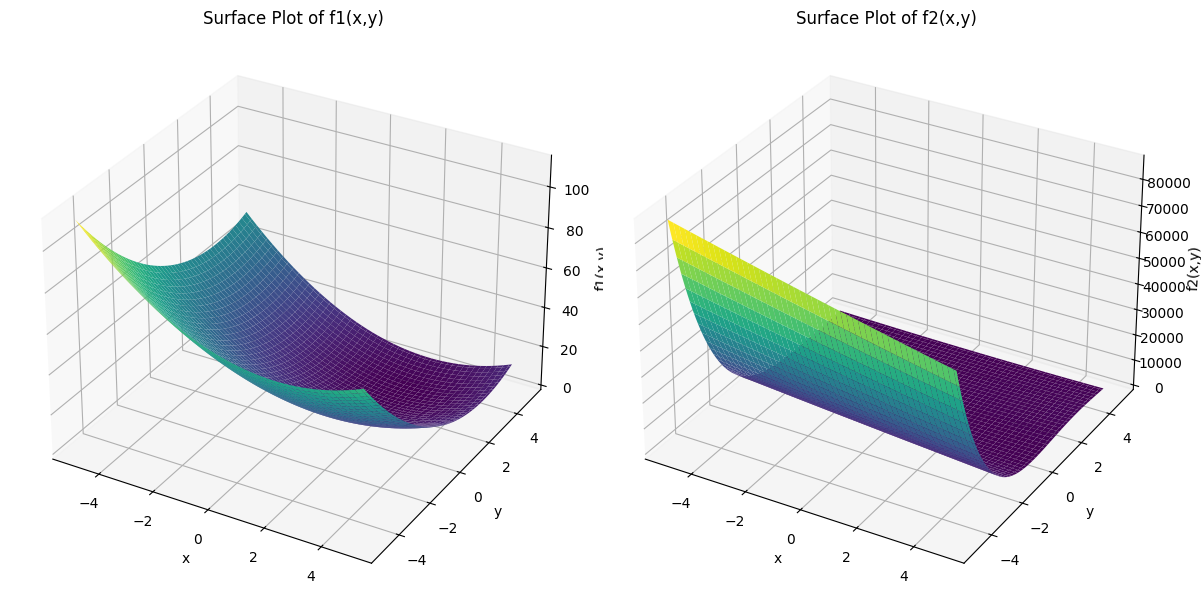

--- Gradient Descent with learning rate = 0.5 ---

Function f1:
   Iteration    x    y  f1(x,y)
0          0  0.0  0.0     13.0
1          1  2.0  3.0      0.0
2          2  2.0  3.0      0.0
3          3  2.0  3.0      0.0
4          4  2.0  3.0      0.0
...
     Iteration    x    y  f1(x,y)
96          96  2.0  3.0      0.0
97          97  2.0  3.0      0.0
98          98  2.0  3.0      0.0
99          99  2.0  3.0      0.0
100        100  2.0  3.0      0.0

Function f2:
   Iteration             x             y        f2(x,y)
0          0  0.000000e+00  0.000000e+00   7.360000e+02
1          1  1.200000e+02  7.240000e+02   5.402137e+12
2          2  1.039448e+07 -1.498867e+10   1.009444e+42
3          3  4.493203e+21  1.346942e+32  6.583035e+129
4          4  3.628508e+65 -9.774782e+97            inf
...
     Iteration   x   y  f2(x,y)
96          96 NaN NaN      NaN
97          97 NaN NaN      NaN
98          98 NaN NaN      NaN
99          99 NaN NaN      NaN
100        100 NaN NaN

<ipython-input-3-f85f159af4c3>:21: RuntimeWarning: overflow encountered in scalar power
  df2_dy_term2 = 20 * 2 * ((x + 3) - (y - 3)**2) * (-2 * (y - 3))
<ipython-input-3-f85f159af4c3>:24: RuntimeWarning: overflow encountered in scalar power
  df2_dx = 20 * 2 * ((x + 3) - (y - 3)**2) * 1
<ipython-input-3-f85f159af4c3>:21: RuntimeWarning: invalid value encountered in scalar subtract
  df2_dy_term2 = 20 * 2 * ((x + 3) - (y - 3)**2) * (-2 * (y - 3))
<ipython-input-3-f85f159af4c3>:24: RuntimeWarning: invalid value encountered in scalar subtract
  df2_dx = 20 * 2 * ((x + 3) - (y - 3)**2) * 1
<ipython-input-3-f85f159af4c3>:11: RuntimeWarning: overflow encountered in square
  return (1 - (y - 3))**2 + 20 * ((x + 3) - (y - 3)**2)**2
<ipython-input-3-f85f159af4c3>:11: RuntimeWarning: invalid value encountered in subtract
  return (1 - (y - 3))**2 + 20 * ((x + 3) - (y - 3)**2)**2
<ipython-input-3-f85f159af4c3>:21: RuntimeWarning: overflow encountered in scalar power
  df2_dy_term2 = 20 * 2 * ((x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Define the functions
def f1(x, y):
    return (x - 2)**2 + (y - 3)**2

def f2(x, y):
    return (1 - (y - 3))**2 + 20 * ((x + 3) - (y - 3)**2)**2

# Define the gradients of the functions
def grad_f1(x, y):
    df1_dx = 2 * (x - 2)
    df1_dy = 2 * (y - 3)
    return np.array([df1_dx, df1_dy])

def grad_f2(x, y):
    df2_dy_term1 = -2 * (1 - (y - 3))
    df2_dy_term2 = 20 * 2 * ((x + 3) - (y - 3)**2) * (-2 * (y - 3))
    df2_dy = df2_dy_term1 + df2_dy_term2

    df2_dx = 20 * 2 * ((x + 3) - (y - 3)**2) * 1
    return np.array([df2_dx, df2_dy])

# Gradient Descent function
def gradient_descent(grad_func, initial_point, learning_rate, iterations):
    point = np.array(initial_point, dtype=float)
    history = [point.copy()]
    for i in range(iterations):
        gradient = grad_func(point[0], point[1])
        point -= learning_rate * gradient
        history.append(point.copy())
    return np.array(history)

# Define ranges for plotting
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)
Z1 = f1(X, Y)
Z2 = f2(X, Y)

# Plot f1(x,y)
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis')
ax1.set_title('Surface Plot of f1(x,y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f1(x,y)')

# Plot f2(x,y)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='viridis')
ax2.set_title('Surface Plot of f2(x,y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f2(x,y)')
plt.tight_layout()
plt.show()

# Starting from initial value: (x,y)=(0,0), use learning rate h=0.5, report f1(x,y) and f2(x,y) values in T=100 iterations.
initial_point = (0, 0)
learning_rate_large = 0.5
iterations = 100

print("--- Gradient Descent with learning rate =", learning_rate_large, "---")

print("\nFunction f1:")
history_f1_large_lr = gradient_descent(grad_f1, initial_point, learning_rate_large, iterations)
f1_values_large_lr = f1(history_f1_large_lr[:, 0], history_f1_large_lr[:, 1])

# Print values as a table
df_f1_large_lr = pd.DataFrame({
    'Iteration': range(iterations + 1),
    'x': history_f1_large_lr[:, 0],
    'y': history_f1_large_lr[:, 1],
    'f1(x,y)': f1_values_large_lr
})
print(df_f1_large_lr.head()) # Print first few rows
print("...")
print(df_f1_large_lr.tail()) # Print last few rows

print("\nFunction f2:")
history_f2_large_lr = gradient_descent(grad_f2, initial_point, learning_rate_large, iterations)
f2_values_large_lr = f2(history_f2_large_lr[:, 0], history_f2_large_lr[:, 1])

# Print values as a table
df_f2_large_lr = pd.DataFrame({
    'Iteration': range(iterations + 1),
    'x': history_f2_large_lr[:, 0],
    'y': history_f2_large_lr[:, 1],
    'f2(x,y)': f2_values_large_lr
})
print(df_f2_large_lr.head()) # Print first few rows
print("...")
print(df_f2_large_lr.tail()) # Print last few rows

# Explanation for learning rate h=0.5
print("\nExplanation for h=0.5:")
print("For f1(x,y): Gradient descent is effective. The function f1 is a simple quadratic function with a single global minimum at (2, 3). The large learning rate allows the algorithm to quickly converge towards the minimum.")
print("For f2(x,y): Gradient descent with a learning rate of 0.5 is likely *not* effective in finding the global minimum. The function f2 is more complex and has a steep landscape in certain areas. A large learning rate can cause the algorithm to overshoot the minimum, potentially oscillating or even diverging.")

# Change learning rate to h=0.01
learning_rate_small = 0.01

print("\n--- Gradient Descent with learning rate =", learning_rate_small, "---")

print("\nFunction f1:")
history_f1_small_lr = gradient_descent(grad_f1, initial_point, learning_rate_small, iterations)
f1_values_small_lr = f1(history_f1_small_lr[:, 0], history_f1_small_lr[:, 1])

# Print values as a table
df_f1_small_lr = pd.DataFrame({
    'Iteration': range(iterations + 1),
    'x': history_f1_small_lr[:, 0],
    'y': history_f1_small_lr[:, 1],
    'f1(x,y)': f1_values_small_lr
})
print(df_f1_small_lr.head()) # Print first few rows
print("...")
print(df_f1_small_lr.tail()) # Print last few rows


print("\nFunction f2:")
history_f2_small_lr = gradient_descent(grad_f2, initial_point, learning_rate_small, iterations)
f2_values_small_lr = f2(history_f2_small_lr[:, 0], history_f2_small_lr[:, 1])

# Print values as a table
df_f2_small_lr = pd.DataFrame({
    'Iteration': range(iterations + 1),
    'x': history_f2_small_lr[:, 0],
    'y': history_f2_small_lr[:, 1],
    'f2(x,y)': f2_values_small_lr
})
print(df_f2_small_lr.head()) # Print first few rows
print("...")
print(df_f2_small_lr.tail()) # Print last few rows


# Explanation for learning rate h=0.01 and motivation for changes
print("\nExplanation for h=0.01 and motivation for changes:")
print("Motivation for change: A smaller learning rate (0.01) is used to address the potential overshooting and divergence issues observed with a larger learning rate, especially for functions with more complex landscapes like f2. A smaller learning rate takes smaller steps in the direction of the negative gradient, which can lead to more stable convergence.")
print("For f1(x,y): Gradient descent with a smaller learning rate will also converge towards the minimum at (2, 3), but it will likely take more iterations to reach a similar level of closeness compared to a larger learning rate.")
print("For f2(x,y): Gradient descent with a smaller learning rate is more likely to converge to a local or global minimum. While the global minimum is near (-3, 3), the complex nature of the function means gradient descent might get stuck in a local minimum depending on the starting point. The smaller learning rate makes it less prone to 'jumping' over minimums.")
print("Final minimum values reached after 100 iterations with h=0.01:")
print(f"f1(x,y) value: {f1_values_small_lr[-1]:.6f} at (x, y) = ({history_f1_small_lr[-1, 0]:.4f}, {history_f1_small_lr[-1, 1]:.4f})")
print(f"f2(x,y) value: {f2_values_small_lr[-1]:.6f} at (x, y) = ({history_f2_small_lr[-1, 0]:.4f}, {history_f2_small_lr[-1, 1]:.4f})")

# Explanation of why gradient descent works and impact of learning rate
print("\nExplanation of Gradient Descent and Learning Rate Impact:")
print("Gradient Descent can be used to search for solutions (minimums) for f1(x,y) and f2(x,y) because it is an iterative optimization algorithm that moves in the direction of the steepest decrease of the function. This direction is given by the negative of the gradient. By repeatedly taking steps proportional to the negative gradient, the algorithm aims to reach a point where the gradient is zero, which corresponds to a local minimum (or in some cases, a global minimum or saddle point).")
print("Impact of Learning Rate:")
print("- **Large Learning Rate:** Allows for faster convergence when the function landscape is simple and the starting point is not too far from the minimum (like f1). However, it can lead to overshooting the minimum, oscillation around the minimum, or even divergence (moving further away from the minimum), especially in complex landscapes with steep gradients (like f2).")
print("- **Small Learning Rate:** Takes smaller steps, which increases the chances of converging to a minimum without overshooting or diverging. It is generally more stable for complex functions. However, it can significantly slow down the convergence process, requiring many more iterations to reach the minimum.")
print("The choice of learning rate is crucial for the performance of gradient descent. It often requires experimentation to find a suitable value that balances convergence speed and stability.")

--- Gradient Descent with learning rate = 0.5 ---

Function f1:
   Iteration    x    y  f1(x,y)
0          0  0.0  0.0     13.0
1          1  2.0  3.0      0.0
2          2  2.0  3.0      0.0
3          3  2.0  3.0      0.0
4          4  2.0  3.0      0.0
...
     Iteration    x    y  f1(x,y)
96          96  2.0  3.0      0.0
97          97  2.0  3.0      0.0
98          98  2.0  3.0      0.0
99          99  2.0  3.0      0.0
100        100  2.0  3.0      0.0

Function f2:
   Iteration             x             y        f2(x,y)
0          0  0.000000e+00  0.000000e+00   7.360000e+02
1          1  1.200000e+02  7.240000e+02   5.402137e+12
2          2  1.039448e+07 -1.498867e+10   1.009444e+42
3          3  4.493203e+21  1.346942e+32  6.583035e+129
4          4  3.628508e+65 -9.774782e+97            inf
...
     Iteration   x   y  f2(x,y)
96          96 NaN NaN      NaN
97          97 NaN NaN      NaN
98          98 NaN NaN      NaN
99          99 NaN NaN      NaN
100        100 NaN NaN

<ipython-input-6-f58f56ce4549>:21: RuntimeWarning: overflow encountered in scalar power
  df2_dy_term2 = 20 * 2 * ((x + 3) - (y - 3)**2) * (-2 * (y - 3))
<ipython-input-6-f58f56ce4549>:24: RuntimeWarning: overflow encountered in scalar power
  df2_dx = 20 * 2 * ((x + 3) - (y - 3)**2) * 1
<ipython-input-6-f58f56ce4549>:21: RuntimeWarning: invalid value encountered in scalar subtract
  df2_dy_term2 = 20 * 2 * ((x + 3) - (y - 3)**2) * (-2 * (y - 3))
<ipython-input-6-f58f56ce4549>:24: RuntimeWarning: invalid value encountered in scalar subtract
  df2_dx = 20 * 2 * ((x + 3) - (y - 3)**2) * 1
<ipython-input-6-f58f56ce4549>:11: RuntimeWarning: overflow encountered in square
  return (1 - (y - 3))**2 + 20 * ((x + 3) - (y - 3)**2)**2
<ipython-input-6-f58f56ce4549>:11: RuntimeWarning: invalid value encountered in subtract
  return (1 - (y - 3))**2 + 20 * ((x + 3) - (y - 3)**2)**2
<ipython-input-6-f58f56ce4549>:21: RuntimeWarning: overflow encountered in scalar power
  df2_dy_term2 = 20 * 2 * ((x

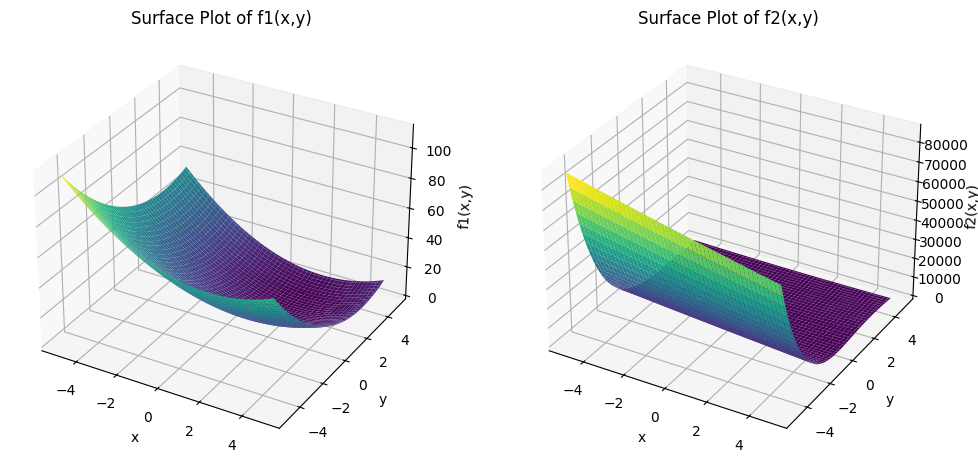

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Define the functions
def f1(x, y):
    return (x - 2)**2 + (y - 3)**2

def f2(x, y):
    return (1 - (y - 3))**2 + 20 * ((x + 3) - (y - 3)**2)**2

# Define the gradients of the functions
def grad_f1(x, y):
    df1_dx = 2 * (x - 2)
    df1_dy = 2 * (y - 3)
    return np.array([df1_dx, df1_dy])

def grad_f2(x, y):
    df2_dy_term1 = -2 * (1 - (y - 3))
    df2_dy_term2 = 20 * 2 * ((x + 3) - (y - 3)**2) * (-2 * (y - 3))
    df2_dy = df2_dy_term1 + df2_dy_term2

    df2_dx = 20 * 2 * ((x + 3) - (y - 3)**2) * 1
    return np.array([df2_dx, df2_dy])

# Gradient Descent function
def gradient_descent(grad_func, initial_point, learning_rate, iterations):
    point = np.array(initial_point, dtype=float)
    history = [point.copy()]
    for i in range(iterations):
        gradient = grad_func(point[0], point[1])
        point -= learning_rate * gradient
        history.append(point.copy())
    return np.array(history)

# Define ranges for plotting
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)
Z1 = f1(X, Y)
Z2 = f2(X, Y)

# Plot f1(x,y)
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis')
ax1.set_title('Surface Plot of f1(x,y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f1(x,y)')

# Plot f2(x,y)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='viridis')
ax2.set_title('Surface Plot of f2(x,y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f2(x,y)')


# Starting from initial value: (x,y)=(0,0), use learning rate h=0.5, report f1(x,y) and f2(x,y) values in T=100 iterations.
initial_point = (0, 0)
learning_rate_large = 0.5
iterations = 100

print("--- Gradient Descent with learning rate =", learning_rate_large, "---")

print("\nFunction f1:")
history_f1_large_lr = gradient_descent(grad_f1, initial_point, learning_rate_large, iterations)
f1_values_large_lr = f1(history_f1_large_lr[:, 0], history_f1_large_lr[:, 1])

# Print values as a table
df_f1_large_lr = pd.DataFrame({
    'Iteration': range(iterations + 1),
    'x': history_f1_large_lr[:, 0],
    'y': history_f1_large_lr[:, 1],
    'f1(x,y)': f1_values_large_lr
})
print(df_f1_large_lr.head()) # Print first few rows
print("...")
print(df_f1_large_lr.tail()) # Print last few rows

print("\nFunction f2:")
history_f2_large_lr = gradient_descent(grad_f2, initial_point, learning_rate_large, iterations)
f2_values_large_lr = f2(history_f2_large_lr[:, 0], history_f2_large_lr[:, 1])

# Print values as a table
df_f2_large_lr = pd.DataFrame({
    'Iteration': range(iterations + 1),
    'x': history_f2_large_lr[:, 0],
    'y': history_f2_large_lr[:, 1],
    'f2(x,y)': f2_values_large_lr
})
print(df_f2_large_lr.head()) # Print first few rows
print("...")
print(df_f2_large_lr.tail()) # Print last few rows

# Explanation for learning rate h=0.5
print("\nExplanation for h=0.5:")
print("For f1(x,y): Gradient descent is effective. The function f1 is a simple quadratic function with a single global minimum at (2, 3). The large learning rate allows the algorithm to quickly converge towards the minimum.")
print("For f2(x,y): Gradient descent with a learning rate of 0.5 is likely *not* effective in finding the global minimum. The function f2 is more complex and has a steep landscape in certain areas. A large learning rate can cause the algorithm to overshoot the minimum, potentially oscillating or even diverging.")

# Change learning rate to h=0.01
learning_rate_small = 0.01

print("\n--- Gradient Descent with learning rate =", learning_rate_small, "---")

print("\nFunction f1:")
history_f1_small_lr = gradient_descent(grad_f1, initial_point, learning_rate_small, iterations)
f1_values_small_lr = f1(history_f1_small_lr[:, 0], history_f1_small_lr[:, 1])

# Print values as a table
df_f1_small_lr = pd.DataFrame({
    'Iteration': range(iterations + 1),
    'x': history_f1_small_lr[:, 0],
    'y': history_f1_small_lr[:, 1],
    'f1(x,y)': f1_values_small_lr
})
print(df_f1_small_lr.head()) # Print first few rows
print("...")
print(df_f1_small_lr.tail()) # Print last few rows


print("\nFunction f2:")
history_f2_small_lr = gradient_descent(grad_f2, initial_point, learning_rate_small, iterations)
f2_values_small_lr = f2(history_f2_small_lr[:, 0], history_f2_small_lr[:, 1])

# Print values as a table
df_f2_small_lr = pd.DataFrame({
    'Iteration': range(iterations + 1),
    'x': history_f2_small_lr[:, 0],
    'y': history_f2_small_lr[:, 1],
    'f2(x,y)': f2_values_small_lr
})
print(df_f2_small_lr.head()) # Print first few rows
print("...")
print(df_f2_small_lr.tail()) # Print last few rows


# Explanation for learning rate h=0.01 and motivation for changes
print("\nExplanation for h=0.01 and motivation for changes:")
print("Motivation for change: A smaller learning rate (0.01) is used to address the potential overshooting and divergence issues observed with a larger learning rate, especially for functions with more complex landscapes like f2. A smaller learning rate takes smaller steps in the direction of the negative gradient, which can lead to more stable convergence.")
print("For f1(x,y): Gradient descent with a smaller learning rate will also converge towards the minimum at (2, 3), but it will likely take more iterations to reach a similar level of closeness compared to a larger learning rate.")
print("For f2(x,y): Gradient descent with a smaller learning rate is more likely to converge to a local or global minimum. While the global minimum is near (-3, 3), the complex nature of the function means gradient descent might get stuck in a local minimum depending on the starting point. The smaller learning rate makes it less prone to 'jumping' over minimums.")
print("Final minimum values reached after 100 iterations with h=0.01:")
print(f"f1(x,y) value: {f1_values_small_lr[-1]:.6f} at (x, y) = ({history_f1_small_lr[-1, 0]:.4f}, {history_f1_small_lr[-1, 1]:.4f})")
print(f"f2(x,y) value: {f2_values_small_lr[-1]:.6f} at (x, y) = ({history_f2_small_lr[-1, 0]:.4f}, {history_f2_small_lr[-1, 1]:.4f})")

# Explanation of why gradient descent works and impact of learning rate
print("\nExplanation of Gradient Descent and Learning Rate Impact:")
print("Gradient Descent can be used to search for solutions (minimums) for f1(x,y) and f2(x,y) because it is an iterative optimization algorithm that moves in the direction of the steepest decrease of the function. This direction is given by the negative of the gradient. By repeatedly taking steps proportional to the negative gradient, the algorithm aims to reach a point where the gradient is zero, which corresponds to a local minimum (or in some cases, a global minimum or saddle point).")
print("Impact of Learning Rate:")
print("- **Large Learning Rate:** Allows for faster convergence when the function landscape is simple and the starting point is not too far from the minimum (like f1). However, it can lead to overshooting the minimum, oscillation around the minimum, or even divergence (moving further away from the minimum), especially in complex landscapes with steep gradients (like f2).")
print("- **Small Learning Rate:** Takes smaller steps, which increases the chances of converging to a minimum without overshooting or diverging. It is generally more stable for complex functions. However, it can significantly slow down the convergence process, requiring many more iterations to reach the minimum.")
print("The choice of learning rate is crucial for the performance of gradient descent. It often requires experimentation to find a suitable value that balances convergence speed and stability.")

In [ ]:
#gemini

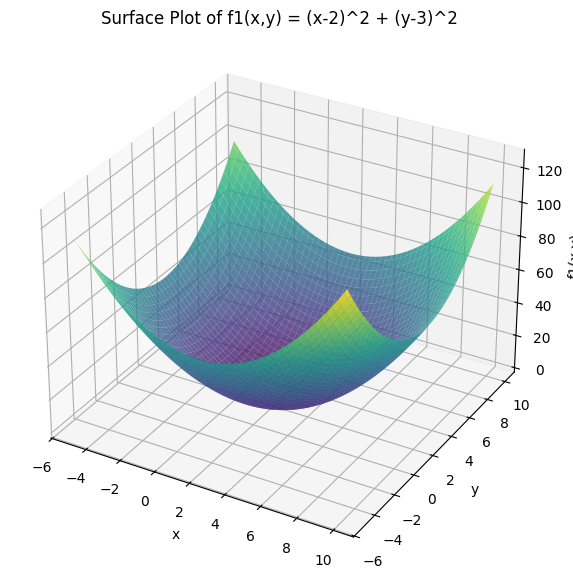

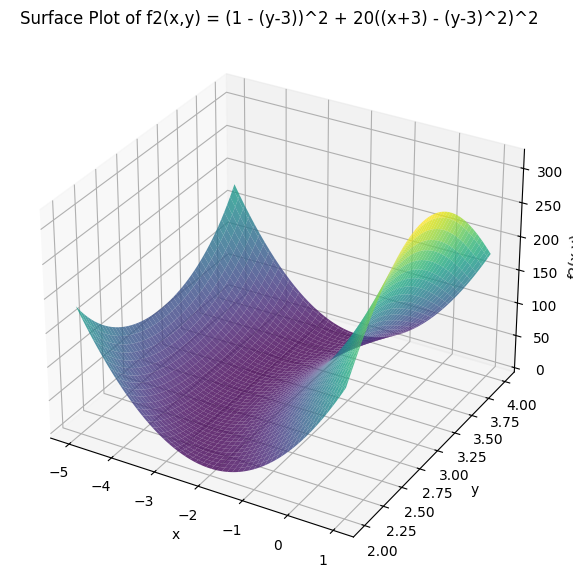

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions
def f1(x, y):
    return (x - 2)**2 + (y - 3)**2

def f2(x, y):
    # This is a variant of the Rosenbrock function
    return (1 - (y - 3))**2 + 20 * ((x + 3) - (y - 3)**2)**2

# Define the partial derivatives for f1
def df1_dx(x, y):
    return 2 * (x - 2)

def df1_dy(x, y):
    return 2 * (y - 3)

# Define the partial derivatives for f2
def df2_dx(x, y):
    return 40 * ((x + 3) - (y - 3)**2)

def df2_dy(x, y):
    # Derivative of (1 - (y-3))^2 wrt y is -2(1-(y-3)) * (-1) = 2(1-(y-3))
    # Let u = y-3. Then (1-u)^2. d/du (1-u)^2 = 2(1-u)(-1). du/dy = 1. So -2(1-(y-3))
    # Term 1: (1 - (y-3))^2 = (4 - y)^2. Its derivative wrt y is 2 * (4 - y) * (-1) = -2(4 - y).
    # Term 2: 20 * ((x + 3) - (y - 3)^2)^2
    # Let v = (x + 3) - (y - 3)^2. Then dv/dy = -2 * (y - 3).
    # d/dy (20 * v^2) = 20 * 2 * v * (dv/dy) = 40 * ((x + 3) - (y - 3)^2) * (-2 * (y - 3))
    #                 = -80 * (y - 3) * ((x + 3) - (y - 3)^2)
    return -2 * (4 - y) - 80 * (y - 3) * ((x + 3) - (y - 3)**2)


# Function to perform gradient descent
def gradient_descent(func, grad_x, grad_y, initial_x, initial_y, learning_rate, iterations):
    x_history = [initial_x]
    y_history = [initial_y]
    f_history = [func(initial_x, initial_y)]

    x, y = initial_x, initial_y

    for i in range(iterations):
        dx = grad_x(x, y)
        dy = grad_y(x, y)

        # Added checks for potential numerical issues (e.g., very large steps, NaN/Inf)
        # These are crucial for functions like f2 with steep gradients
        if np.isinf(dx) or np.isnan(dx) or np.isinf(dy) or np.isnan(dy):
            print(f"Warning: Gradient became NaN or Inf at iteration {i}. Stopping.")
            break
        if abs(dx * learning_rate) > 1e10 or abs(dy * learning_rate) > 1e10:
            print(f"Warning: Step magnitude too large at iteration {i}. Stopping to prevent overflow.")
            break

        x = x - learning_rate * dx
        y = y - learning_rate * dy

        current_f_val = func(x, y)
        if np.isnan(current_f_val) or np.isinf(current_f_val):
            print(f"Warning: Function value NaN or Inf at iteration {i}. Stopping.")
            break

        x_history.append(x)
        y_history.append(y)
        f_history.append(current_f_val)

    return x_history, y_history, f_history

# Plot f1(x,y)
fig1 = plt.figure(figsize=(10, 7))
ax1 = fig1.add_subplot(111, projection='3d')
x_range_f1 = np.linspace(-5, 10, 100)
y_range_f1 = np.linspace(-5, 10, 100)
X1, Y1 = np.meshgrid(x_range_f1, y_range_f1)
Z1 = f1(X1, Y1)
ax1.plot_surface(X1, Y1, Z1, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f1(x,y)')
ax1.set_title('Surface Plot of f1(x,y) = (x-2)^2 + (y-3)^2')
plt.show()

# Plot f2(x,y) - Rosenbrock-like function, requires careful range selection
fig2 = plt.figure(figsize=(10, 7))
ax2 = fig2.add_subplot(111, projection='3d')
# Adjusted range to better show the valley for f2 around its minimum at (x=-3, y=3)
x_range_f2 = np.linspace(-5, 1, 100)
y_range_f2 = np.linspace(2, 4, 100)
X2, Y2 = np.meshgrid(x_range_f2, y_range_f2)
Z2 = f2(X2, Y2)
ax2.plot_surface(X2, Y2, Z2, cmap='viridis', alpha=0.8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f2(x,y)')
ax2.set_title('Surface Plot of f2(x,y) = (1 - (y-3))^2 + 20((x+3) - (y-3)^2)^2')
plt.show()